Seoul Bike Sharing Demand Prediction

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


Load Data

In [2]:
data_path =r"C:\Users\ajayr\OneDrive\Docs\GitHub\Royal-Python\Bike Sharing Demand Prediction Project\SeoulBikeData.csv.xlsx"
df = pd.read_excel(data_path)
print(df.shape)

(8760, 14)


In [3]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

Data Information

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[us]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   str           
 12  Holiday          

In [5]:
df.describe(include="all")

Date  Rented Bike Count         Hour  Temperature(°C)  \
count                  8760        8760.000000  8760.000000      8760.000000   
unique                  NaN                NaN          NaN              NaN   
top                     NaN                NaN          NaN              NaN   
freq                    NaN                NaN          NaN              NaN   
mean    2018-06-01 00:00:00         704.602055    11.500000        12.882922   
min     2017-12-01 00:00:00           0.000000     0.000000       -17.800000   
25%     2018-03-02 00:00:00         191.000000     5.750000         3.500000   
50%     2018-06-01 00:00:00         504.500000    11.500000        13.700000   
75%     2018-08-31 00:00:00        1065.250000    17.250000        22.500000   
max     2018-11-30 00:00:00        3556.000000    23.000000        39.400000   
std                     NaN         644.997468     6.922582        11.944825   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   
std       20.362413          1.036300        608.298712   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   
std                     13.060369                 0.868746      1.128193   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN

In [6]:
df.describe(include="all").T

count unique         top  freq  \
Date                         8760    NaN         NaN   NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   
Hour                       8760.0    NaN         NaN   NaN   
Temperature(°C)            8760.0    NaN         NaN   NaN   
Humidity(%)                8760.0    NaN         NaN   NaN   
Wind speed (m/s)           8760.0    NaN         NaN   NaN   
Visibility (10m)           8760.0    NaN         NaN   NaN   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN   
Rainfall(mm)               8760.0    NaN         NaN   NaN   
Snowfall (cm)              8760.0    NaN         NaN   NaN   
Seasons                      8760      4      Spring  2208   
Holiday                      8760      2  No Holiday  8328   
Functioning Day              8760      2         Yes  8465   

                                          mean                  min  \
Date                       2018-06-01 00:00:00  2017-12-01 00:00:00   
Rented Bike Count                   704.602055                  0.0   
Hour                                      11.5                  0.0   
Temperature(°C)                      12.882922                -17.8   
Humidity(%)                          58.226256                  0.0   
Wind speed (m/s)                      1.724909                  0.0   
Visibility (10m)                   1436.825799                 27.0   
Dew point temperature(°C)             4.073813                -30.6   
Solar Radiation (MJ/m2)               0.569111                  0.0   
Rainfall(mm)                          0.148687                  0.0   
Snowfall (cm)                         0.075068                  0.0   
Seasons                                    NaN                  NaN   
Holiday                                    NaN                  NaN   
Functioning Day                            NaN                  NaN   

                                           25%                  50%  \
Date                       2018-03-02 00:00:00  2018-06-01 00:00:00   
Rented Bike Count                        191.0                504.5   
Hour                                      5.75                 11.5   
Temperature(°C)                            3.5                 13.7   
Humidity(%)                               42.0                 57.0   
Wind speed (m/s)                           0.9                  1.5   
Visibility (10m)                         940.0               1698.0   
Dew point temperature(°C)                 -4.7                  5.1   
Solar Radiation (MJ/m2)                    0.0                 0.01   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                    NaN                  NaN   
Holiday                                    NaN                  NaN   
Functioning Day                            NaN                  NaN   

                                           75%                  max  \
Date                       2018-08-31 00:00:00  2018-11-30 00:00:00   
Rented Bike Count                      1065.25               3556.0   
Hour                                     17.25                 23.0   
Temperature(°C)                           22.5                 39.4   
Humidity(%)                               74.0                 98.0   
Wind speed (m/s)                           2.3                  7.4   
Visibility (10m)                        2000.0               2000.0   
Dew point temperature(°C)                 14.8                 27.2   
Solar Radiation (MJ/m2)                   0.93                 3.52   
Rainfall(mm)                               0.0                 35.0   
Snowfall (cm)                              0.0                  8.8   
Seasons                                    NaN                  NaN   
Holiday                                   

Check NUll Value

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df["Date"]=pd.to_datetime(df["Date"])

df["Weekday"]=df["Date"].dt.day_name()
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

df.drop("Date", axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   str    
 11  Holiday                    8760 non-null   str    
 12  Functioning Day            8760 non-null   str    
 13  Weekday                    8760 non-null   str    
 14  Day

In [10]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day Weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Friday   
1           0.0            0.0  Winter  No Holiday             Yes  Friday   
2           0.0            0.0  Winter  No Holiday             Yes  Friday   
3           0.0            0.0  Winter  No Holiday             Yes  Friday   
4           0.0            0.0  Winter  No Holiday             Yes  Friday   

   Day  Month  Year  
0    1     12  2017  
1    1     12  2017  
2    1     12  2017  
3    1     12  2017  
4    1     12  2017

EDA

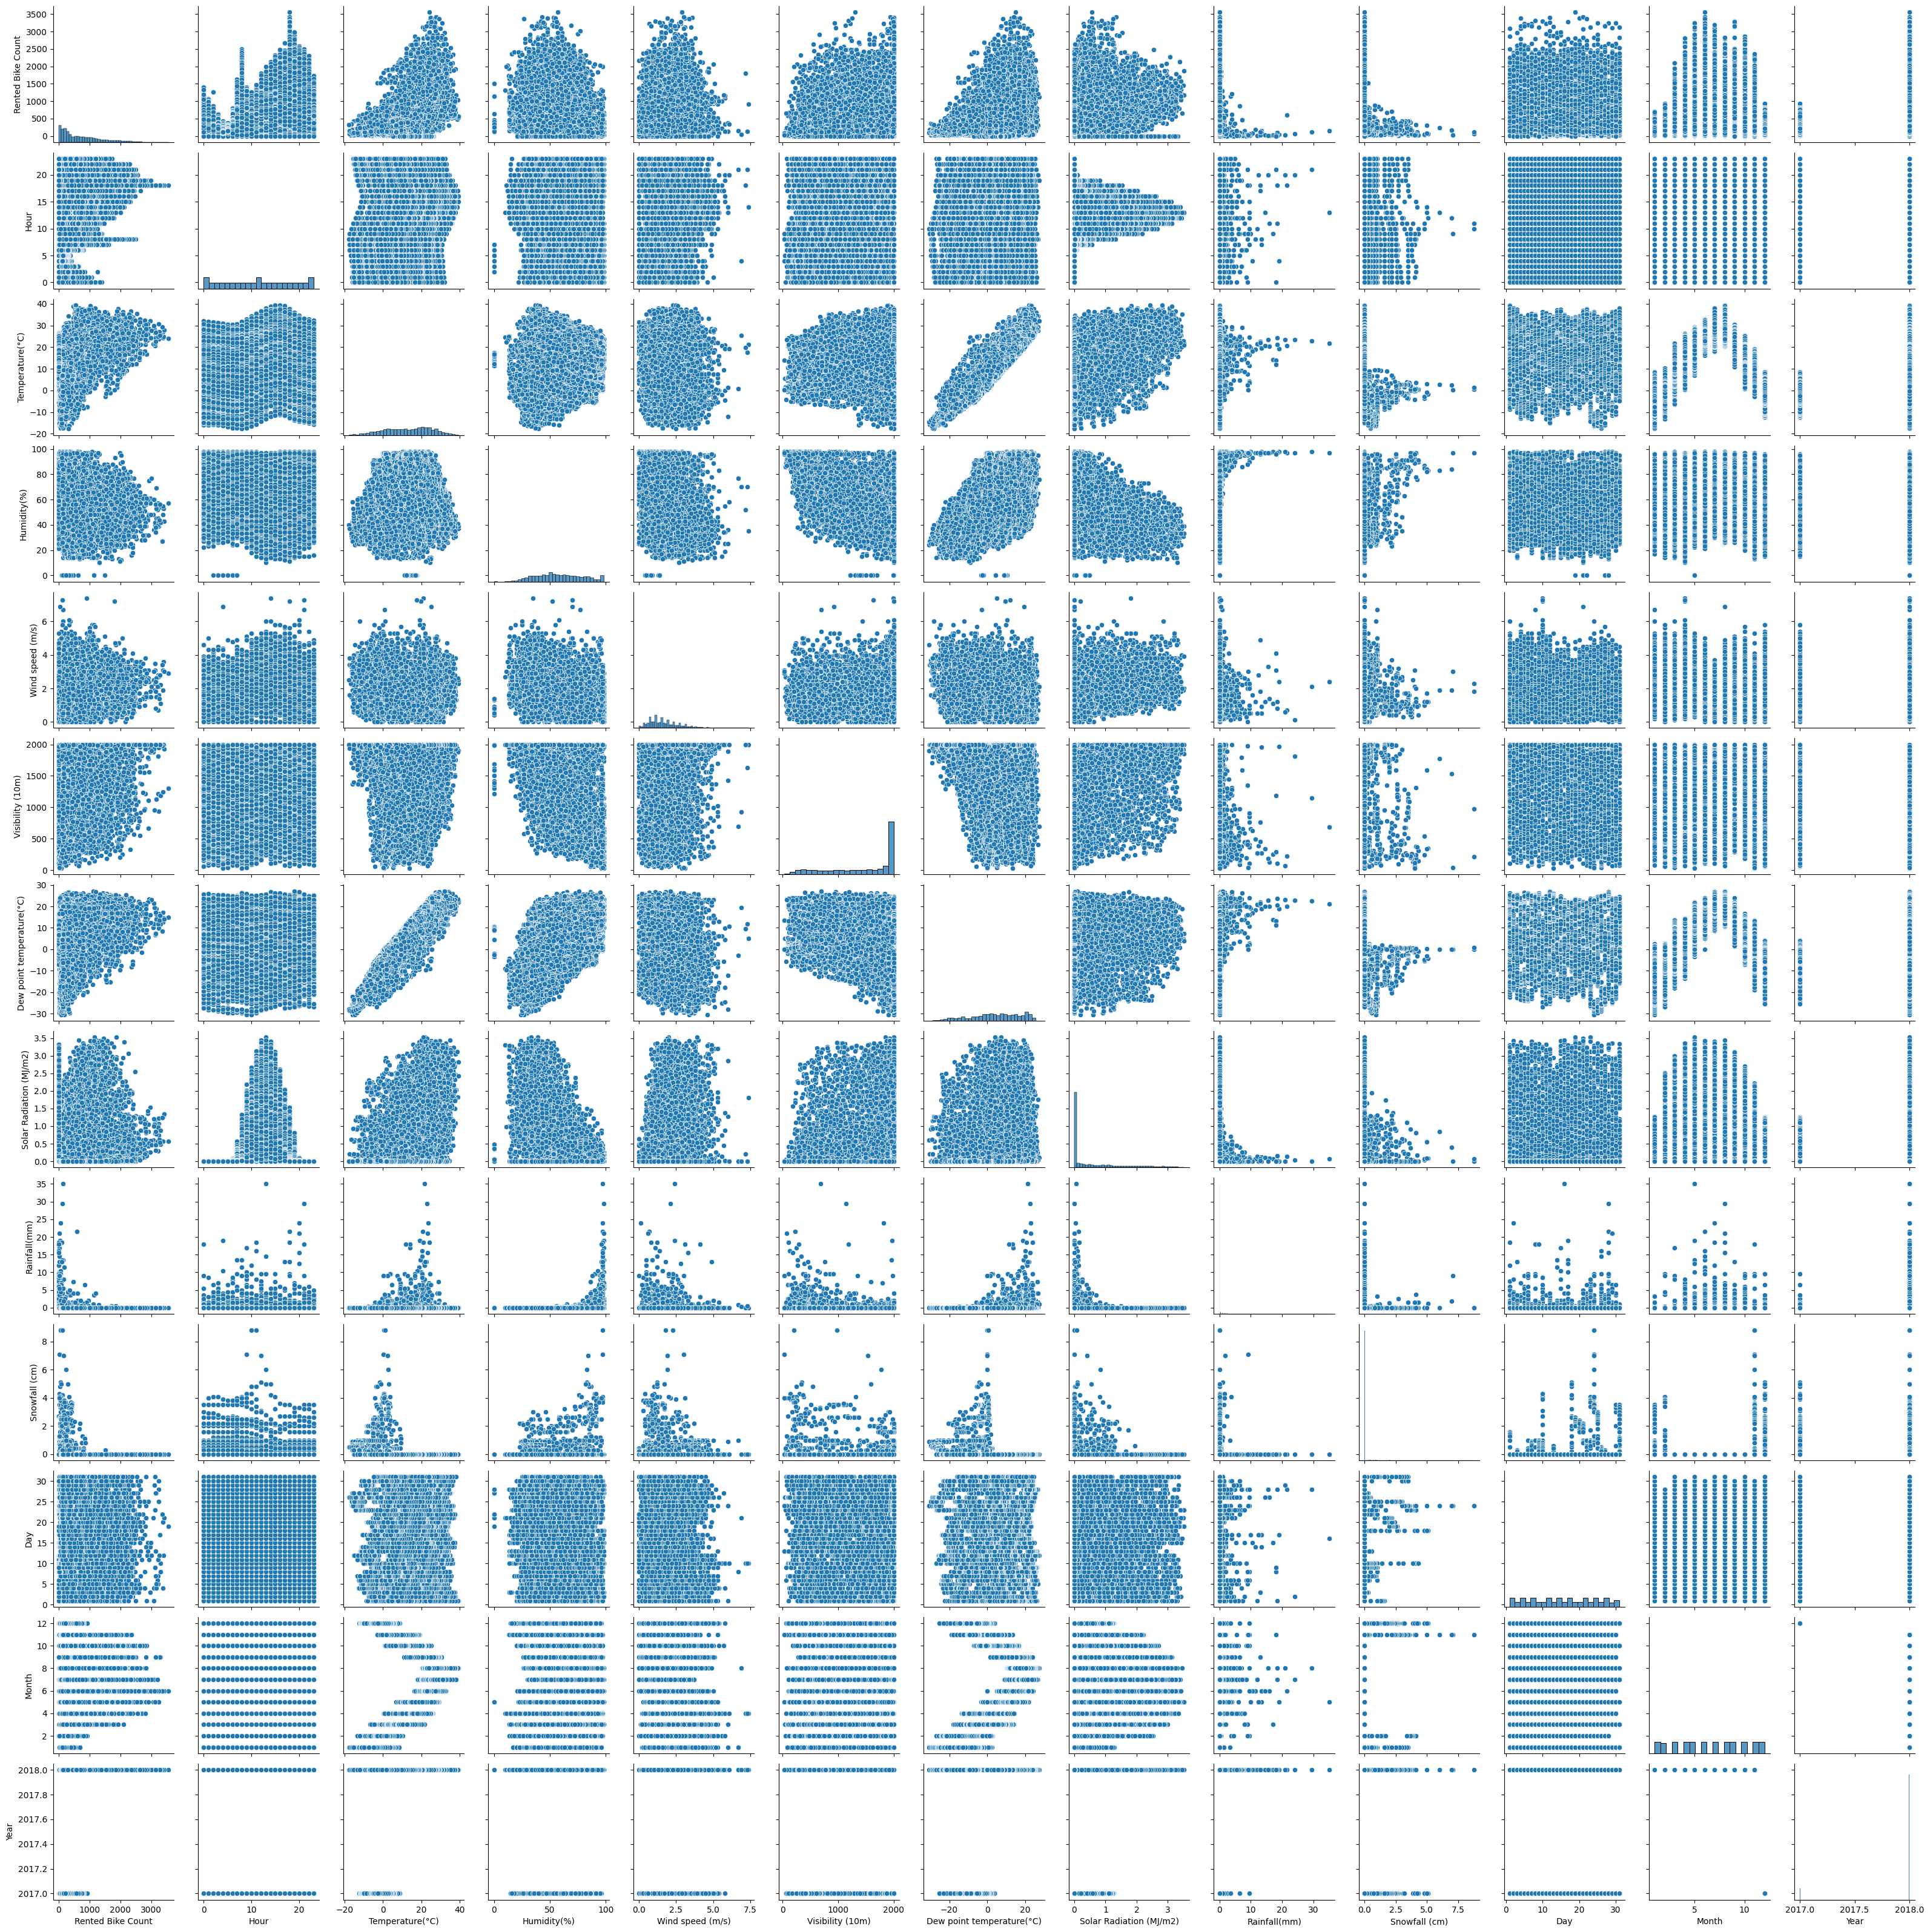

In [11]:
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

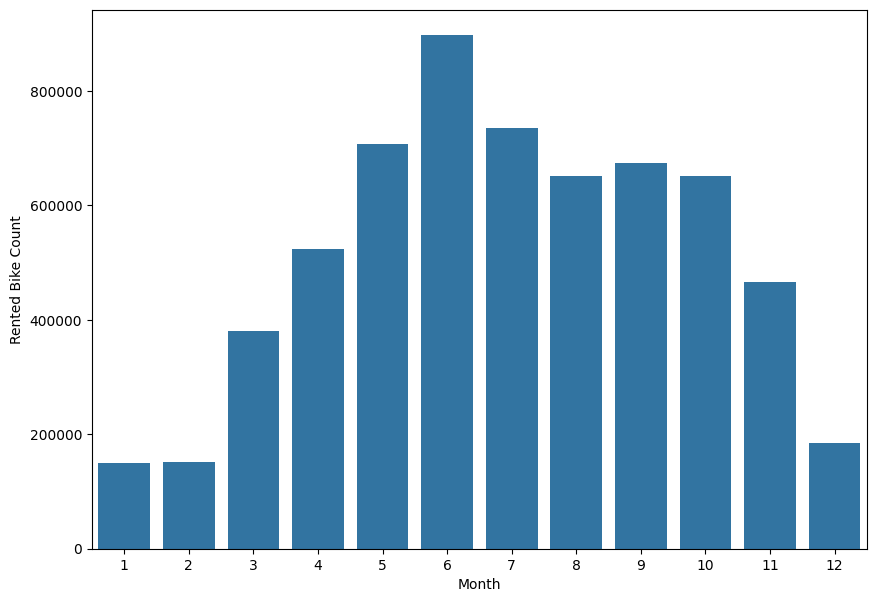

In [12]:
plt.figure(figsize=(10,7))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

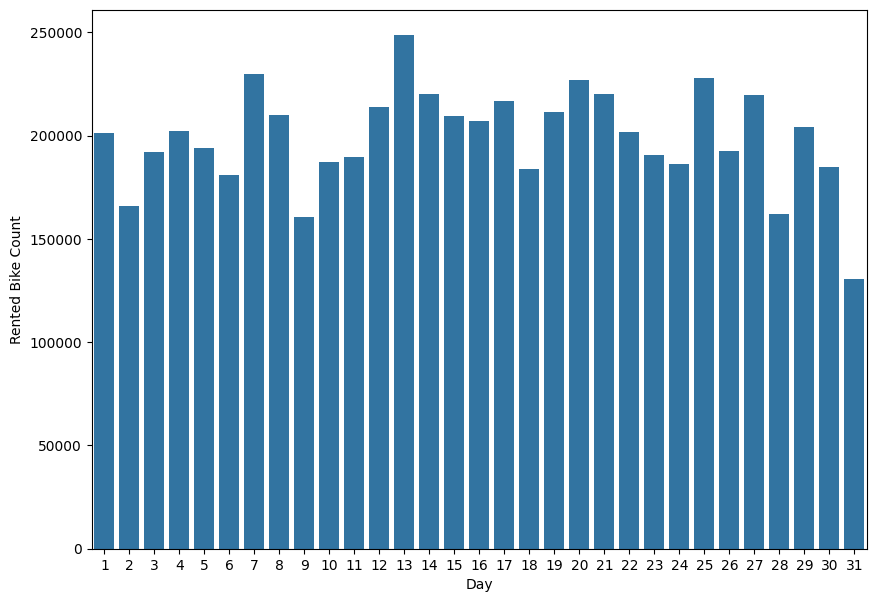

In [13]:
plt.figure(figsize=(10,7))
Month = df.groupby("Day").sum().reset_index()
sns.barplot(x="Day", y="Rented Bike Count", data=Month)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

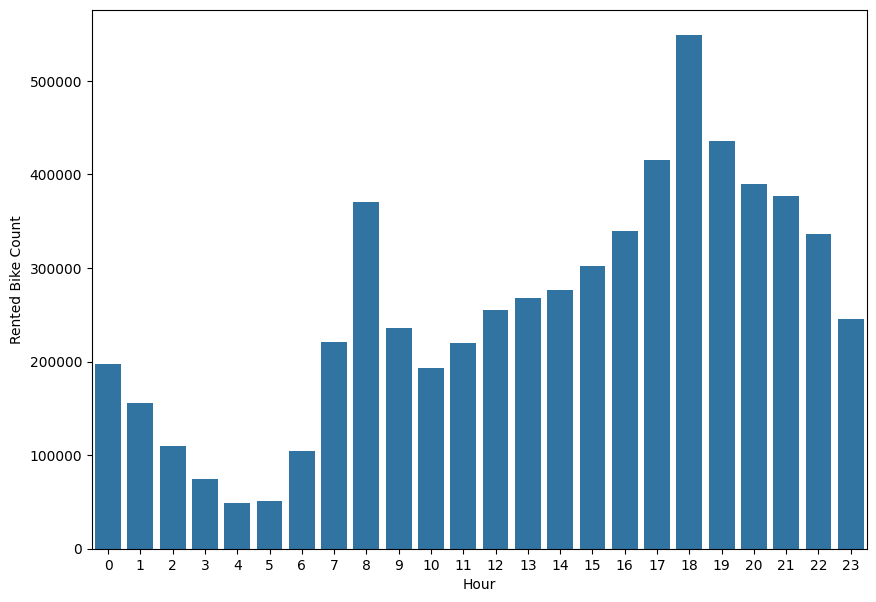

In [14]:
plt.figure(figsize=(10,7))
Hour = df.groupby("Hour").sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=Hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

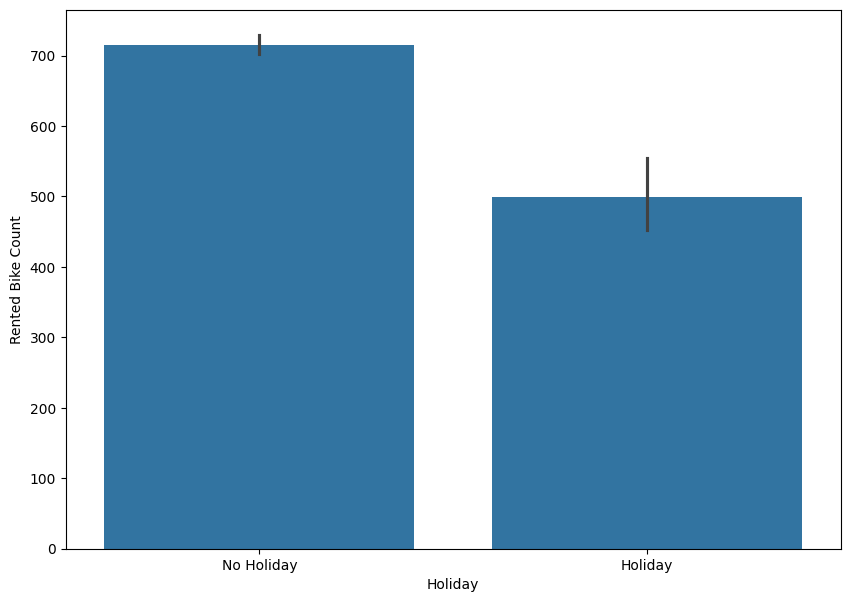

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(x="Holiday", y="Rented Bike Count", data=df)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

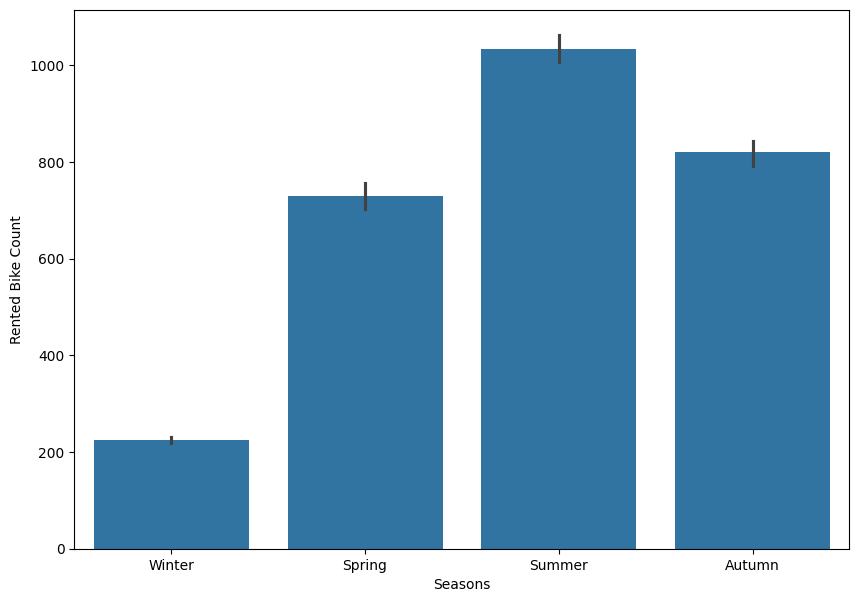

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons", y="Rented Bike Count", data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

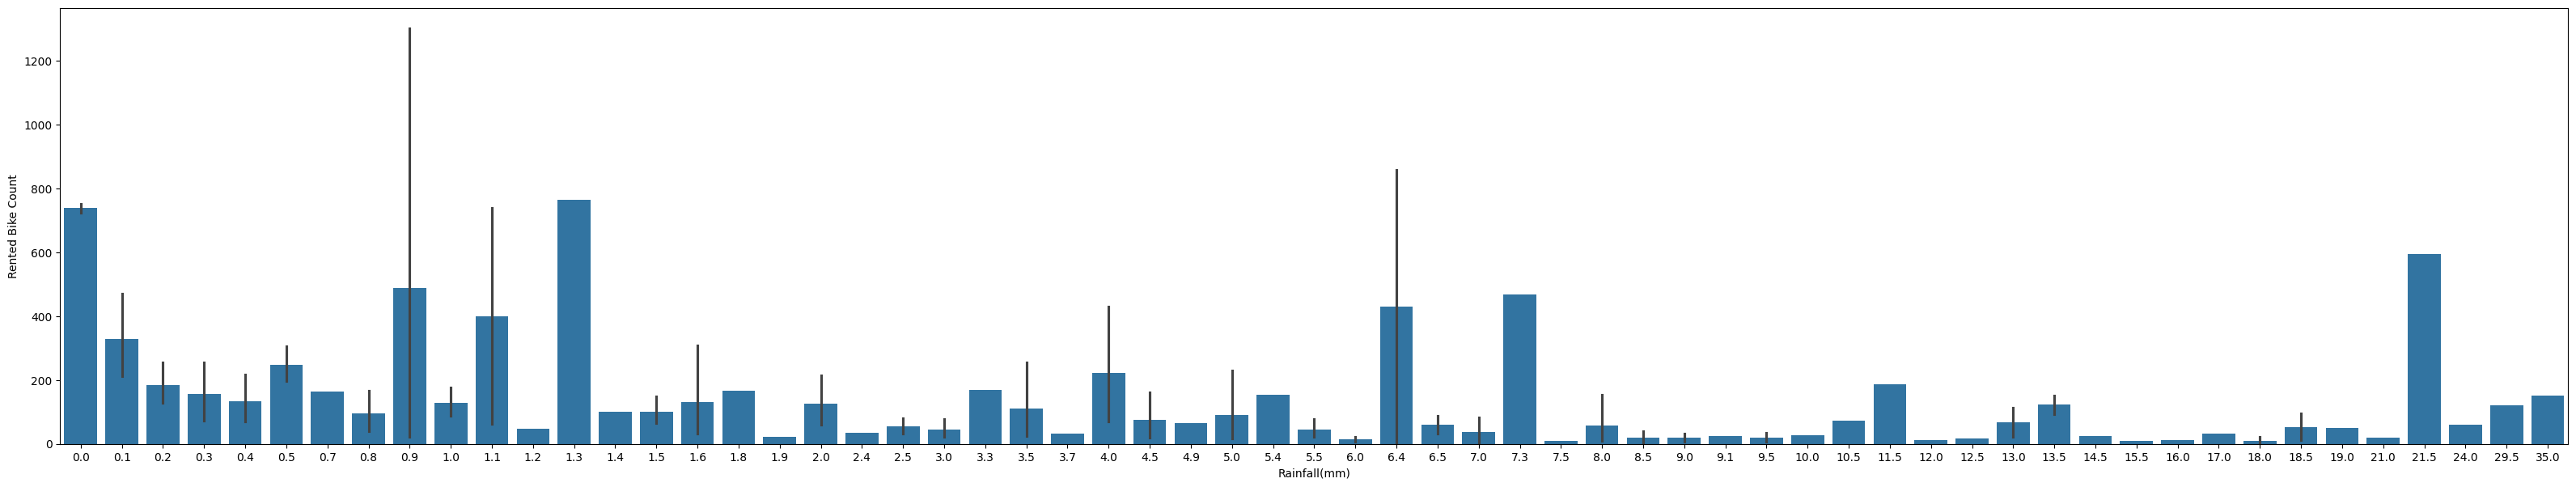

In [17]:
plt.figure(figsize=(40,7))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

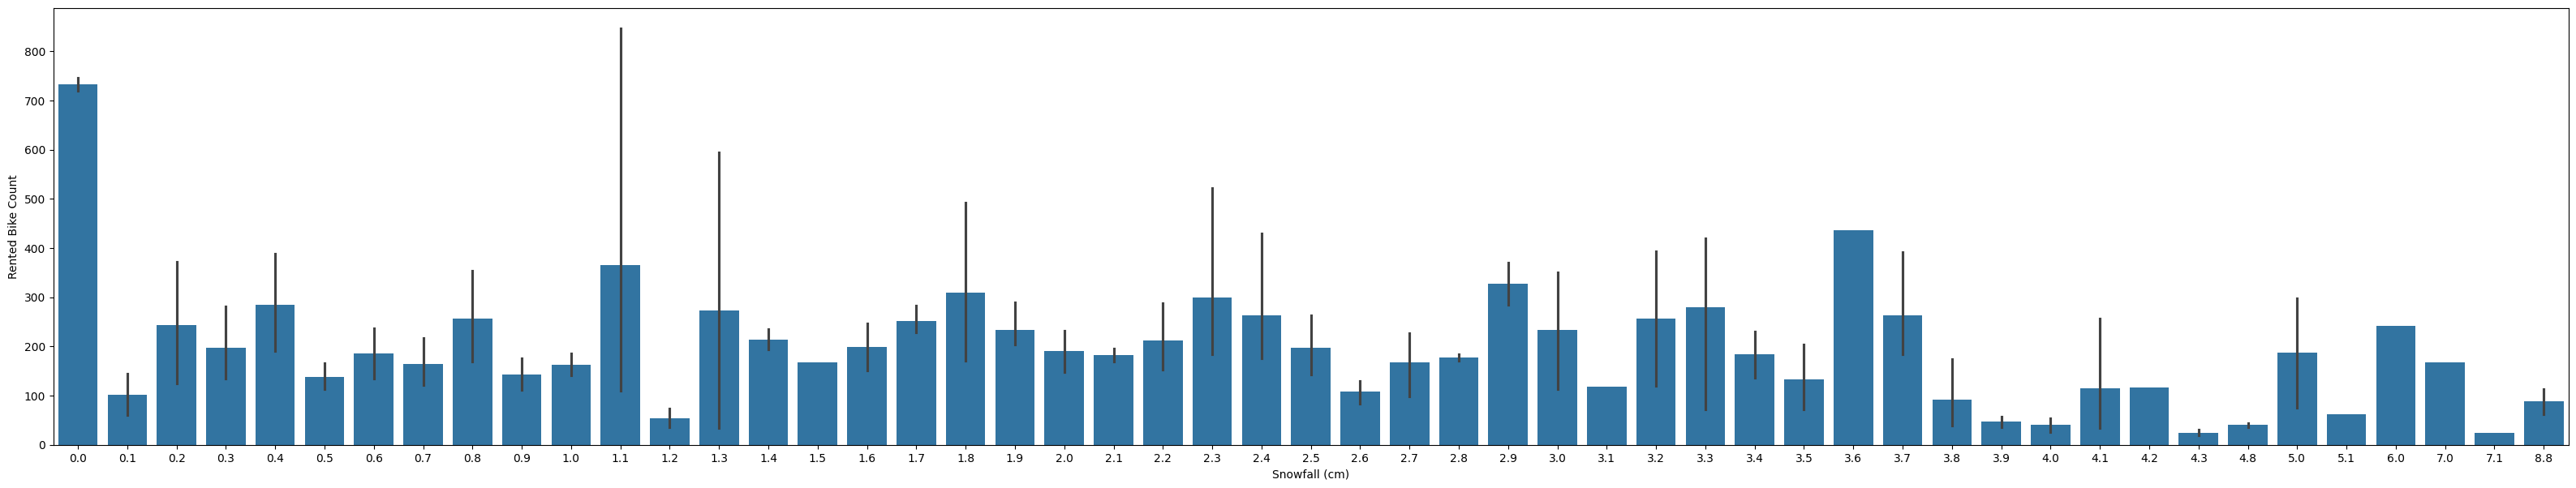

In [18]:
plt.figure(figsize=(40,7))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=df)

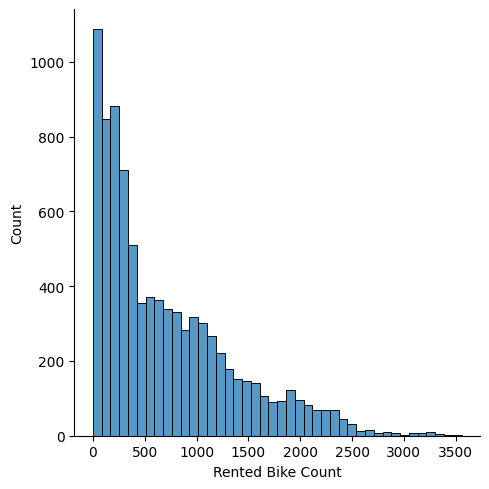

In [19]:
sns.displot(df["Rented Bike Count"])

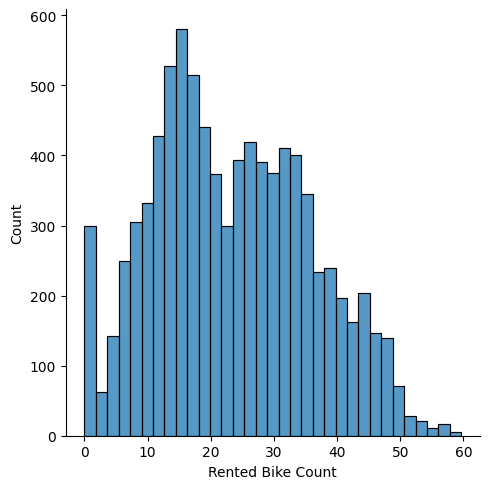

In [20]:
sns.displot(np.sqrt(df["Rented Bike Count"]))

Skewed Data

In [21]:
df.select_dtypes(include='number').skew().sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

Remove Multi-Collinearity  

<Axes: >

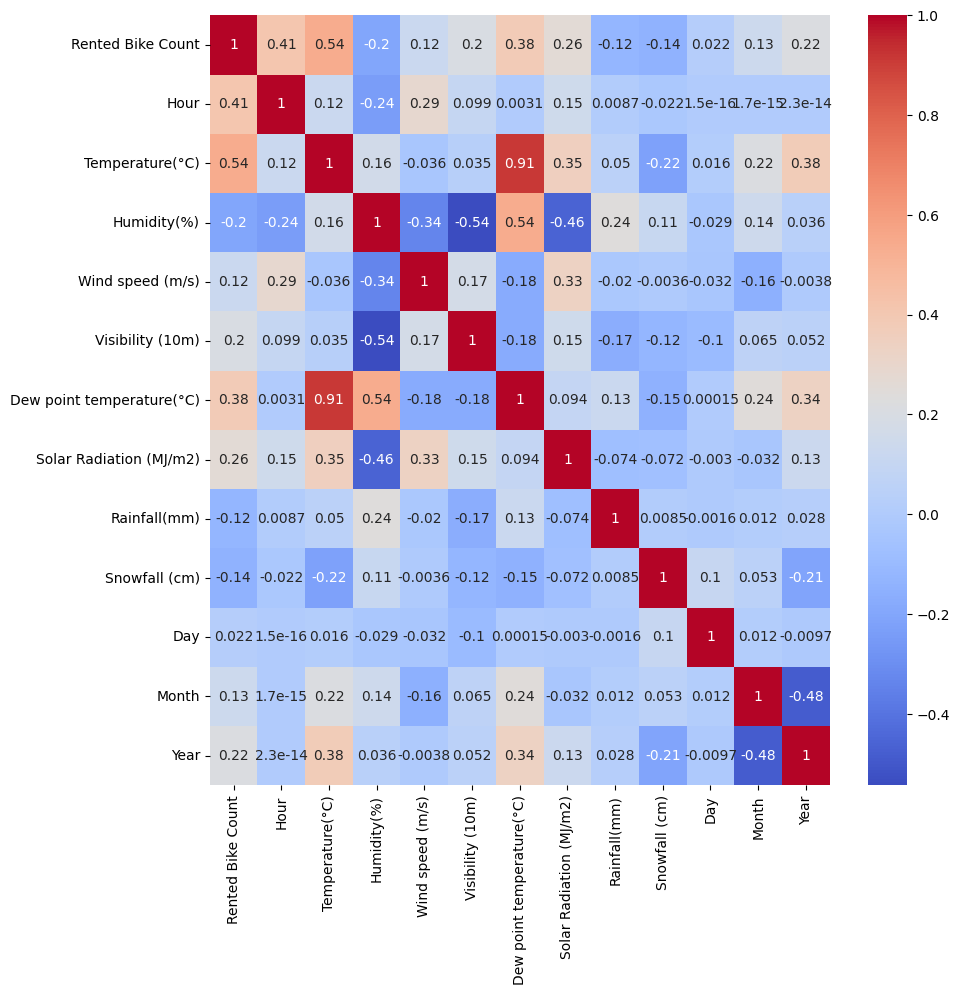

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")

In [23]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variable"]=df.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

In [24]:
not_for_vif =["Day", "Month", "Year", "Rented Bike Count"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variable        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [25]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

In [26]:
not_for_vif =["Day", "Month", "Year", "Rented Bike Count"]
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variable       VIF
0                     Hour  3.921832
1          Temperature(°C)  3.228318
2              Humidity(%)  4.868221
3         Wind speed (m/s)  4.608625
4         Visibility (10m)  4.710170
5  Solar Radiation (MJ/m2)  2.246791
6             Rainfall(mm)  1.079158
7            Snowfall (cm)  1.120579

Encoding

In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   str    
 10  Holiday                  8760 non-null   str    
 11  Functioning Day          8760 non-null   str    
 12  Weekday                  8760 non-null   str    
 13  Day                      8760 non-null   int32  
 14  Month                    8760 non-n

In [28]:
cat_features =["Seasons", "Holiday", "Functioning Day", "Weekday"]

In [29]:
df["Holiday"].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [30]:
df["Functioning Day"].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [31]:
df["Seasons"].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [32]:
df["Weekday"].value_counts()

Weekday
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [33]:
df["Holiday"]= df ["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"]= df ["Functioning Day"].map({"No":0, "Yes":1})

In [34]:
df_seasons = pd.get_dummies(df["Seasons"], drop_first=True)
df_weekday =pd.get_dummies(df["Weekday"], drop_first=True)

In [35]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   str    
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   str    
 13  Day                      8760 non-null   int32  
 14  Month                    8760 non-n

In [36]:
df = pd.concat([df,df_seasons, df_weekday], axis=1)

In [37]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   str    
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   str    
 13  Day                      8760 non-null   int32  
 14  Month                    8760 non-n

In [38]:
df.drop(["Seasons", "Weekday"], axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                   8760 non-n

In [40]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...  2017   False   False    True   False     False   False   
1        0  ...  2017   False   False    True   False     False   False   
2        0  ...  2017   False   False    True   False     False   False   
3        0  ...  2017   False   False    True   False     False   False   
4        0  ...  2017   False   False    True   False     False   False   

   Thursday  Tuesday  Wednesday  
0     False    False      False  
1     False    False      False  
2     False    False      False  
3     False    False      False  
4     False    False      False  

[5 rows x 23 columns]

In [41]:
df.shape

(8760, 23)